In [5]:
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
num_classes = 2

In [3]:
from tensorflow.keras.optimizers import Adam

In [8]:
model=EfficientNetB1(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=2,
    classifier_activation='softmax'
)

27018416/27018416 [==============================] - 7s 0us/step


In [9]:
# load the ResNet50 model and add a few layers on top
model = Sequential()
model.add(EfficientNetB1(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling='avg',
    classes=2,
    classifier_activation='softmax'
))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
for layer in model.layers[0].layers:
    layer.trainable = False

In [14]:
# compile the model
model.compile(optimizer=Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Neetiraj\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
# define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [16]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_dir = r"C:\Users\Neetiraj\Videos\archive\traindata\traindata"
val_dir = r"C:\Users\Neetiraj\Videos\archive\testdata\testdata"

In [18]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 2891 images belonging to 2 classes.


In [19]:
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 1330 images belonging to 2 classes.


In [20]:
# train the model
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator))

C:\Users\Neetiraj\AppData\Local\Temp\ipykernel_3224\2123495152.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
91/91 [==============================] - 887s 9s/step - loss: 0.6749 - accuracy: 0.6323 - val_loss: 0.6240 - val_accuracy: 0.6857
Epoch 2/10
91/91 [==============================] - 715s 8s/step - loss: 0.6531 - accuracy: 0.6582 - val_loss: 0.6292 - val_accuracy: 0.6857
Epoch 3/10
91/91 [==============================] - 587s 6s/step - loss: 0.6500 - accuracy: 0.6551 - val_loss: 0.6230 - val_accuracy: 0.6857
Epoch 4/10
91/91 [==============================] - 595s 7s/step - loss: 0.6521 - accuracy: 0.6572 - val_loss: 0.6296 - val_accuracy: 0.6857
Epoch 5/10
91/91 [==============================] - 601s 7s/step - loss: 0.6487 - accuracy: 0.6572 - val_loss: 0.6293 - val_accuracy: 0.6857
Epoch 6/10
91/91 [==============================] - 611s 7s/step - loss: 0.6453 - accuracy: 0.6572 - val_loss: 0.6288 - val_accuracy: 0.6857
Epoch 7/10
91/91 [==============================] - 338s 4s/step - loss: 0.6499 - accuracy: 0.6572 - val_loss: 0.6238 - val_accuracy: 0.6857
Epoch 8/10
91

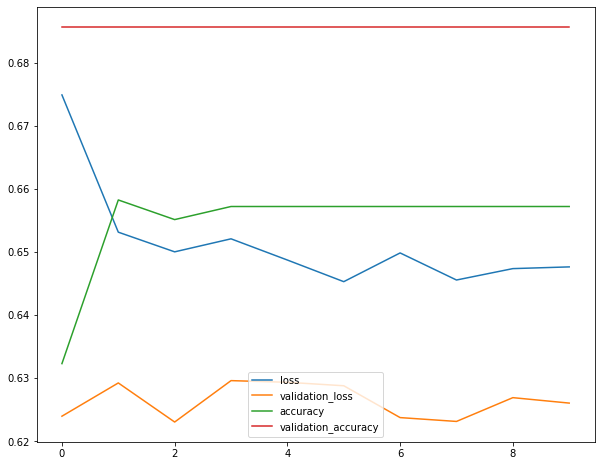

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()

In [22]:
# define the data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_dir = r"C:\Users\Neetiraj\Videos\archive\traindata\traindata"
val_dir = r"C:\Users\Neetiraj\Videos\archive\testdata\testdata"


In [23]:
# create the generators for the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
# create the generators for the training, validation, and test sets
val_generator = validation_datagen.flow_from_directory(val_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 2891 images belonging to 2 classes.
Found 1330 images belonging to 2 classes.


In [24]:
# train the model
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              steps_per_epoch=len(train_generator),
                              validation_steps=len(validation_generator))

C:\Users\Neetiraj\AppData\Local\Temp\ipykernel_3224\2123495152.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
91/91 [==============================] - 428s 5s/step - loss: 0.6469 - accuracy: 0.6572 - val_loss: 0.6262 - val_accuracy: 0.6857
Epoch 2/10
91/91 [==============================] - 395s 4s/step - loss: 0.6462 - accuracy: 0.6551 - val_loss: 0.6255 - val_accuracy: 0.6857
Epoch 3/10
91/91 [==============================] - 371s 4s/step - loss: 0.6480 - accuracy: 0.6572 - val_loss: 0.6306 - val_accuracy: 0.6857
Epoch 4/10
91/91 [==============================] - 368s 4s/step - loss: 0.6445 - accuracy: 0.6572 - val_loss: 0.6298 - val_accuracy: 0.6857
Epoch 5/10
91/91 [==============================] - 355s 4s/step - loss: 0.6477 - accuracy: 0.6572 - val_loss: 0.6314 - val_accuracy: 0.6857
Epoch 6/10
91/91 [==============================] - 351s 4s/step - loss: 0.6462 - accuracy: 0.6572 - val_loss: 0.6301 - val_accuracy: 0.6857
Epoch 7/10
91/91 [==============================] - 358s 4s/step - loss: 0.6458 - accuracy: 0.6572 - val_loss: 0.6258 - val_accuracy: 0.6857
Epoch 8/10
91

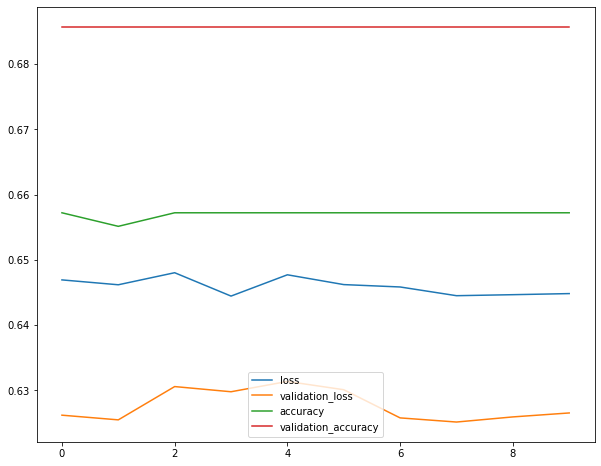

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))
plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.show()